# Car Evaluation Dataset

### In this project, we compare 3 models (SVM, MLP, Logistic Regression) on Car Evaluation dataset and we use GridSearchCV for hypertuning our models 

#### GridSearchCV is an exhaustive search method, which ensures we get the best hyperparameters from our parameter grid, but it comes at the expense of a long execution time and/or an intensive workload; if time or performance are an issue, you might consider using RandomSearchCV, but it is not exhaustive and finding the best hyperparameters is not guaranteed.

#### This dataset was obtained from  https://archive.ics.uci.edu/ml/datasets/car+evaluation
#### Creator: Marko Bohanec
#### Donors: 
#### Marko Bohanec (marko.bohanec@ijs.si)
#### Blaz Zupan (blaz.zupan@ijs.si)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import category_encoders as ce
import matplotlib.pyplot as plt

### Dataset preprocessing 

In [2]:
#Loading Dataset into dataframe
df = pd.read_csv("car_evaluation.csv",header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
#setting column names for dataset
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns=col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
#print Info, Describe and check for missing values

print("---------Info---------\n")
df.info()
print("\n")
print("---------Describe---------\n")
print(df.describe().T)
print("\n")
print("---------Missing Values---------\n")
df.isna().sum()

#we can see that dataset has no missing values so we can start processing the dataset for training 

---------Info---------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


---------Describe---------

         count unique    top  freq
buying    1728      4  vhigh   432
maint     1728      4  vhigh   432
doors     1728      4      2   432
persons   1728      3      2   576
lug_boot  1728      3  small   576
safety    1728      3    low   576
class     1728      4  unacc  1210


---------Missing Values---------



buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
#Splitting the dataset into features (X) and labels (y)
X=df.drop('class',axis=1)
y=df['class']

In [7]:
#Encoding the dataset to transform the categorical values of the relevant features into numerical ones
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X=encoder.fit_transform(X)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


In [10]:
#Splitting the dataset into training and test (0.7,0.3), there is no need to split a validation set since we are using GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print('Training set size:',y_train.size)
print('Test set size:',y_test.size)

Training set size: 1209
Test set size: 519


# SVM

In [11]:
#setting svm parameters to prepare for hypertuning using GridSearchCV
svm_params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly']} 

svm_grid = GridSearchCV(SVC(random_state=42), svm_params)
svm_grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [12]:
#Best Hyperparameters
best_svm_params = svm_grid.best_params_
print("Best SVM Hyperparameters:", best_svm_params)

Best SVM Hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [13]:
#training the model using the best hyperparameters 
svm = SVC(**best_svm_params, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_svm = svm.predict(X_test)

In [14]:
#Accuracy Score
accuracy_score_svm = accuracy_score(y_test,y_pred_test_svm)
print("SVM Accuracy:", round(accuracy_score_svm,4))

SVM Accuracy: 0.9769


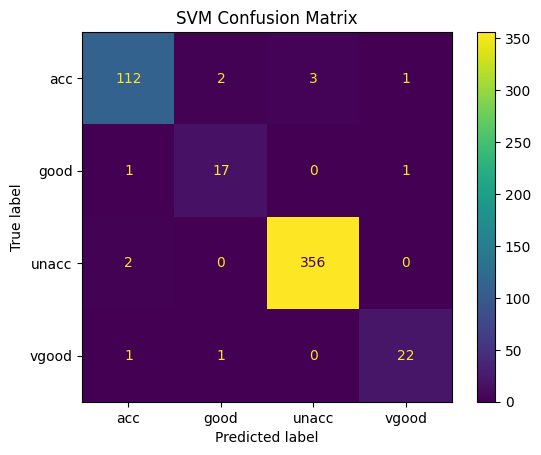

In [15]:
#forming confusion matrix and plotting 
confusion_matrix_svm = confusion_matrix(y_test,y_pred_test_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm, display_labels = ['acc', 'good','unacc','vgood'])
cm_display.plot()
cm_display.ax_.set_title("SVM Confusion Matrix")
plt.show()

In [16]:
#Classification Report
classification_report_svm = classification_report(y_test,y_pred_test_svm)
print("\t\tClassification Report for SVM\n")
print(classification_report_svm)

		Classification Report for SVM

              precision    recall  f1-score   support

         acc       0.97      0.95      0.96       118
        good       0.85      0.89      0.87        19
       unacc       0.99      0.99      0.99       358
       vgood       0.92      0.92      0.92        24

    accuracy                           0.98       519
   macro avg       0.93      0.94      0.93       519
weighted avg       0.98      0.98      0.98       519



# Logistic Regression

In [ ]:
#Setting Logistic Regression parameters to prepare for hyperparameter tuning using GridSearchCV
log_params = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg','liblinear','lbfgs','saga'],
    'max_iter' : [2500, 5000]
    }
]

log_grid = GridSearchCV(LogisticRegression(),log_params)
log_grid.fit(X_train,y_train)

#We see that some fits failed, this is expected because some solvers dont work with some penalties, it doesnt affect the final outcome of GridSearchCV

In [18]:
#Best Hyperparameters
best_log_params = log_grid.best_params_
print("Best Logistic Regression Hyperparameters:", best_log_params)

Best Logistic Regression Hyperparameters: {'C': 29.763514416313132, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
#training the model using the best hyperparameters 
log = LogisticRegression(**best_log_params, random_state=42)
log.fit(X_train, y_train)
y_pred_test_log=log.predict(X_test)

In [21]:
#Accuracy 
accuracy_score_log=accuracy_score(y_test,y_pred_test_log)
print("Logistic Regression Accuracy:", round(accuracy_score_log,4))

Logistic Regression Accuracy: 0.8285


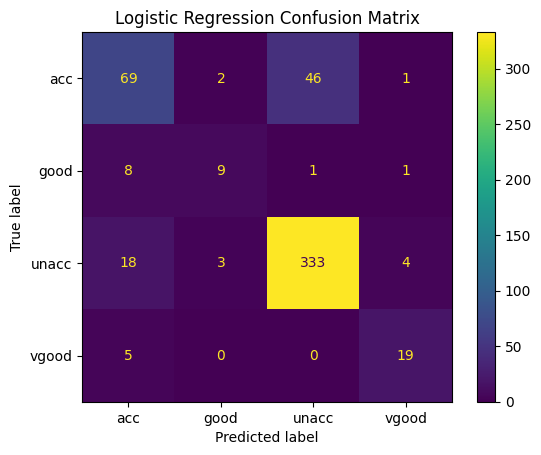

In [22]:
#forming confusion matrix and plotting 
confusion_matrix_log = confusion_matrix(y_test,y_pred_test_log)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_log, display_labels = ['acc', 'good','unacc','vgood'])
cm_display.plot()
cm_display.ax_.set_title("Logistic Regression Confusion Matrix")
plt.show()

In [23]:
classification_report_log = classification_report(y_test,y_pred_test_log)
print("\tClassification Report for Logistic Regression\n")
print(classification_report_log)

	Classification Report for Logistic Regression

              precision    recall  f1-score   support

         acc       0.69      0.58      0.63       118
        good       0.64      0.47      0.55        19
       unacc       0.88      0.93      0.90       358
       vgood       0.76      0.79      0.78        24

    accuracy                           0.83       519
   macro avg       0.74      0.70      0.71       519
weighted avg       0.82      0.83      0.82       519



# MLP

In [ ]:
#Setting MLP parameters to prepare for hyperparameter tuning using GridSearchCV
mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}

mlp_grid = GridSearchCV(MLPClassifier(max_iter=1500),mlp_params)
mlp_grid.fit(X_train,y_train)

In [34]:
#Best hyperparameters
best_mlp_params = mlp_grid.best_params_
print("Best MLP Hyperparameters:", best_mlp_params)

Best MLP Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50, 25), 'solver': 'adam'}


In [35]:
#training the model using the best hyperparameters 
mlp = MLPClassifier(**best_mlp_params, random_state=42,max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_test_mlp=mlp.predict(X_test)

In [36]:
#Accuracy 
accuracy_score_mlp=accuracy_score(y_test,y_pred_test_mlp)
print("MLP Accuracy:", round(accuracy_score_mlp,4))

MLP Accuracy: 0.9692


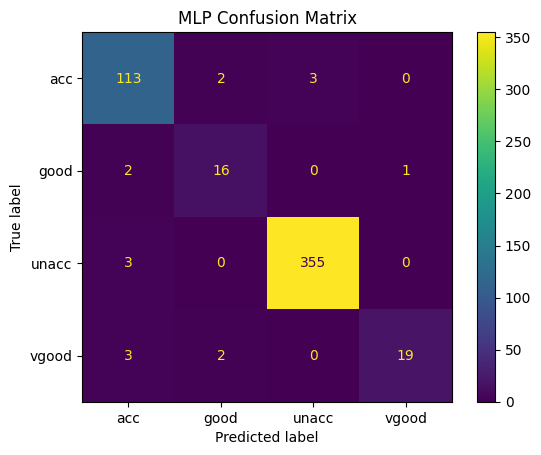

In [28]:
#forming confusion matrix and plotting 
confusion_matrix_mlp = confusion_matrix(y_test,y_pred_test_mlp)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mlp, display_labels = ['acc', 'good','unacc','vgood'])
cm_display.plot()
cm_display.ax_.set_title("MLP Confusion Matrix")
plt.show()

In [29]:
classification_report_mlp = classification_report(y_test,y_pred_test_mlp)
print("\t\tClassification Report for MLP\n")
print(classification_report_mlp)

		Classification Report for MLP

              precision    recall  f1-score   support

         acc       0.93      0.96      0.95       118
        good       0.80      0.84      0.82        19
       unacc       0.99      0.99      0.99       358
       vgood       0.95      0.79      0.86        24

    accuracy                           0.97       519
   macro avg       0.92      0.90      0.91       519
weighted avg       0.97      0.97      0.97       519



# Baseline Models

In [33]:
log_base = LogisticRegression(random_state = 42,max_iter =2500)
log_base.fit(X_train,y_train)
y_pred_test_log_base = log_base.predict(X_test)
accuracy_score_log_base=accuracy_score(y_test,y_pred_test_log_base)
print("Base Model Logistic Regression Accuracy:", round(accuracy_score_log_base,4))

Base Model Logistic Regression Accuracy: 0.8189


In [31]:
SVM_base = SVC(random_state = 42)
SVM_base.fit(X_train,y_train)
y_pred_test_svm_base = SVM_base.predict(X_test)
accuracy_score_svm_base=accuracy_score(y_test,y_pred_test_svm_base)
print("Base Model SVM Accuracy:", round(accuracy_score_svm_base,4))

Base Model SVM Accuracy: 0.9634


In [32]:
MLP_base = MLPClassifier(random_state = 42, max_iter = 1000)
MLP_base.fit(X_train,y_train)
y_pred_test_mlp_base = MLP_base.predict(X_test)
accuracy_score_mlp_base=accuracy_score(y_test,y_pred_test_mlp_base)
print("Base MLP Accuracy:", round(accuracy_score_mlp_base,4))

Base MLP Accuracy: 0.9326
